In [19]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("DBtrainrides.csv")
train_df

,ID,line,path,eva_nr,category,station,state,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,info,arrival_delay_check,departure_delay_check
0,1573967790757085557-2407072312-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.767800,2024-07-08 00:00:00,2024-07-08 00:01:00,2024-07-08 00:03:00,2024-07-08 00:04:00,3,3,NaN,on_time,on_time
1,349781417030375472-2407080017-1,18,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.767800,NaN,2024-07-08 00:17:00,NaN,NaN,0,0,NaN,on_time,on_time
2,7157250219775883918-2407072120-25,1,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...,8000406,4,Aachen-Rothe Erde,Nordrhein-Westfalen,Aachen,52066,6.116475,50.770202,2024-07-08 00:03:00,2024-07-08 00:04:00,2024-07-08 00:03:00,2024-07-08 00:04:00,0,0,NaN,on_time,on_time
3,349781417030375472-2407080017-2,18,Aachen Hbf,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,NaN,NaN,0,0,NaN,on_time,on_time
4,1983158592123451570-2407080010-3,33,Herzogenrath|Kohlscheid,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,2024-07-08 00:20:00,2024-07-08 00:21:00,0,0,NaN,on_time,on_time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061352,-3877986638624297828-2407142237-4,S9,Bottrop Hbf|Bottrop-Boy|Gladbeck West,8002795,5,Herten (Westf),Nordrhein-Westfalen,Herten,45699,7.139053,51.597508,2024-07-14 23:17:00,2024-07-14 23:17:00,NaN,NaN,0,0,NaN,on_time,on_time
2061353,3370285438001482281-2407142234-7,8,Lübeck-Travemünde Strand|Lübeck-Travemünde Haf...,8003775,5,Lübeck-Moisling,Schleswig-Holstein,Lübeck,23560,10.629500,53.836800,2024-07-14 23:10:00,2024-07-14 23:11:00,2024-07-14 23:11:00,2024-07-14 23:12:00,1,1,Information,on_time,on_time
2061354,-8774053210575864323-2407142305-3,80,Bad Oldesloe|Reinfeld(Holst),8003775,5,Lübeck-Moisling,Schleswig-Holstein,Lübeck,23560,10.629500,53.836800,2024-07-14 23:17:00,2024-07-14 23:18:00,2024-07-14 23:17:00,2024-07-14 23:18:00,0,0,Information,on_time,on_time
2061355,-1537118689903044118-2407142354-1,11,NaN,8001580,4,Düsseldorf Flughafen Terminal,Nordrhein-Westfalen,Düsseldorf,40474,6.766979,51.278517,NaN,2024-07-14 23:54:00,NaN,NaN,0,0,Information. (Quelle: zuginfo.nrw),on_time,on_time


In [3]:
def transform_info(df):
    df["info_present"] = False
    for index, row in df.iterrows():
        if pd.notna(row['info']):
            df.at[index, "info_present"] = True

In [4]:
def check_for_info(df):
    info_set = set()
    for index, row in df.iterrows():
        if pd.notna(row["info"]):
            info_set.add(row["info"])
    return info_set

In [11]:
def transform_info_message(df):
    df["transformed_info_message"] = "No message"
    for index, row in df.iterrows():
        if pd.notna(row["info"]):
            df.at[index, "transformed_info_message"] = re.sub(r'\.\s*\(.*?\)', '', row["info"])

In [21]:
def compute_statistics(df):
    return df.groupby(['info_present', 'arrival_delay_check']).size().unstack(fill_value=0)

In [12]:
transform_info(train_df)
transform_info_message(train_df)
train_df

,ID,line,path,eva_nr,category,station,state,city,zip,long,...,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,info,arrival_delay_check,departure_delay_check,info_present,transformed_info_message
0,1573967790757085557-2407072312-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,2024-07-08 00:01:00,2024-07-08 00:03:00,2024-07-08 00:04:00,3,3,NaN,on_time,on_time,False,No message
1,349781417030375472-2407080017-1,18,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,2024-07-08 00:17:00,NaN,NaN,0,0,NaN,on_time,on_time,False,No message
2,7157250219775883918-2407072120-25,1,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...,8000406,4,Aachen-Rothe Erde,Nordrhein-Westfalen,Aachen,52066,6.116475,...,2024-07-08 00:04:00,2024-07-08 00:03:00,2024-07-08 00:04:00,0,0,NaN,on_time,on_time,False,No message
3,349781417030375472-2407080017-2,18,Aachen Hbf,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,...,2024-07-08 00:21:00,NaN,NaN,0,0,NaN,on_time,on_time,False,No message
4,1983158592123451570-2407080010-3,33,Herzogenrath|Kohlscheid,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,...,2024-07-08 00:21:00,2024-07-08 00:20:00,2024-07-08 00:21:00,0,0,NaN,on_time,on_time,False,No message
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061352,-3877986638624297828-2407142237-4,S9,Bottrop Hbf|Bottrop-Boy|Gladbeck West,8002795,5,Herten (Westf),Nordrhein-Westfalen,Herten,45699,7.139053,...,2024-07-14 23:17:00,NaN,NaN,0,0,NaN,on_time,on_time,False,No message
2061353,3370285438001482281-2407142234-7,8,Lübeck-Travemünde Strand|Lübeck-Travemünde Haf...,8003775,5,Lübeck-Moisling,Schleswig-Holstein,Lübeck,23560,10.629500,...,2024-07-14 23:11:00,2024-07-14 23:11:00,2024-07-14 23:12:00,1,1,Information,on_time,on_time,True,Information
2061354,-8774053210575864323-2407142305-3,80,Bad Oldesloe|Reinfeld(Holst),8003775,5,Lübeck-Moisling,Schleswig-Holstein,Lübeck,23560,10.629500,...,2024-07-14 23:18:00,2024-07-14 23:17:00,2024-07-14 23:18:00,0,0,Information,on_time,on_time,True,Information
2061355,-1537118689903044118-2407142354-1,11,NaN,8001580,4,Düsseldorf Flughafen Terminal,Nordrhein-Westfalen,Düsseldorf,40474,6.766979,...,2024-07-14 23:54:00,NaN,NaN,0,0,Information. (Quelle: zuginfo.nrw),on_time,on_time,True,Information


In [ ]:
train_df.drop("info", axis=1)

,ID,line,path,eva_nr,category,station,state,city,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,info_present,transformed_info_message
0,1573967790757085557-2407072312-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,2024-07-08 00:00:00,2024-07-08 00:01:00,2024-07-08 00:03:00,2024-07-08 00:04:00,3,3,on_time,on_time,False,No message
1,349781417030375472-2407080017-1,18,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,NaN,2024-07-08 00:17:00,NaN,NaN,0,0,on_time,on_time,False,No message
2,7157250219775883918-2407072120-25,1,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...,8000406,4,Aachen-Rothe Erde,Nordrhein-Westfalen,Aachen,52066,6.116475,...,2024-07-08 00:03:00,2024-07-08 00:04:00,2024-07-08 00:03:00,2024-07-08 00:04:00,0,0,on_time,on_time,False,No message
3,349781417030375472-2407080017-2,18,Aachen Hbf,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,...,2024-07-08 00:20:00,2024-07-08 00:21:00,NaN,NaN,0,0,on_time,on_time,False,No message
4,1983158592123451570-2407080010-3,33,Herzogenrath|Kohlscheid,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,...,2024-07-08 00:20:00,2024-07-08 00:21:00,2024-07-08 00:20:00,2024-07-08 00:21:00,0,0,on_time,on_time,False,No message
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061352,-3877986638624297828-2407142237-4,S9,Bottrop Hbf|Bottrop-Boy|Gladbeck West,8002795,5,Herten (Westf),Nordrhein-Westfalen,Herten,45699,7.139053,...,2024-07-14 23:17:00,2024-07-14 23:17:00,NaN,NaN,0,0,on_time,on_time,False,No message
2061353,3370285438001482281-2407142234-7,8,Lübeck-Travemünde Strand|Lübeck-Travemünde Haf...,8003775,5,Lübeck-Moisling,Schleswig-Holstein,Lübeck,23560,10.629500,...,2024-07-14 23:10:00,2024-07-14 23:11:00,2024-07-14 23:11:00,2024-07-14 23:12:00,1,1,on_time,on_time,True,Information
2061354,-8774053210575864323-2407142305-3,80,Bad Oldesloe|Reinfeld(Holst),8003775,5,Lübeck-Moisling,Schleswig-Holstein,Lübeck,23560,10.629500,...,2024-07-14 23:17:00,2024-07-14 23:18:00,2024-07-14 23:17:00,2024-07-14 23:18:00,0,0,on_time,on_time,True,Information
2061355,-1537118689903044118-2407142354-1,11,NaN,8001580,4,Düsseldorf Flughafen Terminal,Nordrhein-Westfalen,Düsseldorf,40474,6.766979,...,NaN,2024-07-14 23:54:00,NaN,NaN,0,0,on_time,on_time,True,Information.


In [ ]:
compute_statistics(train_df)

arrival_delay_check,delay,on_time
info_present,,
False,67907,1348109
True,43046,602295


- could be used for a potential regression or a decision tree
- however the purities wouldn't be that high

data = {
    'Bauarbeiten',
    'Bauarbeiten. (Quelle: zuginfo.nrw)',
    'Großstörung',
    'Information',
    'Information. (Quelle: zuginfo.nrw)',
    'Störung',
    'Störung. (Quelle: zuginfo.nrw)'
}

In [ ]:
train_df.groupby(['transformed_info_message', 'arrival_delay_check']).size().unstack(fill_value=0)

arrival_delay_check,delay,on_time
transformed_info_message,,
Bauarbeiten,5969,90332
Bauarbeiten.,7882,64673
Großstörung,377,8029
Information,13260,230773
Information.,3948,75029
No message,67907,1348109
Störung,7939,108386
Störung.,3671,25073


In [16]:
mean_delay = train_df.groupby("transformed_info_message")["arrival_delay_m"].mean()

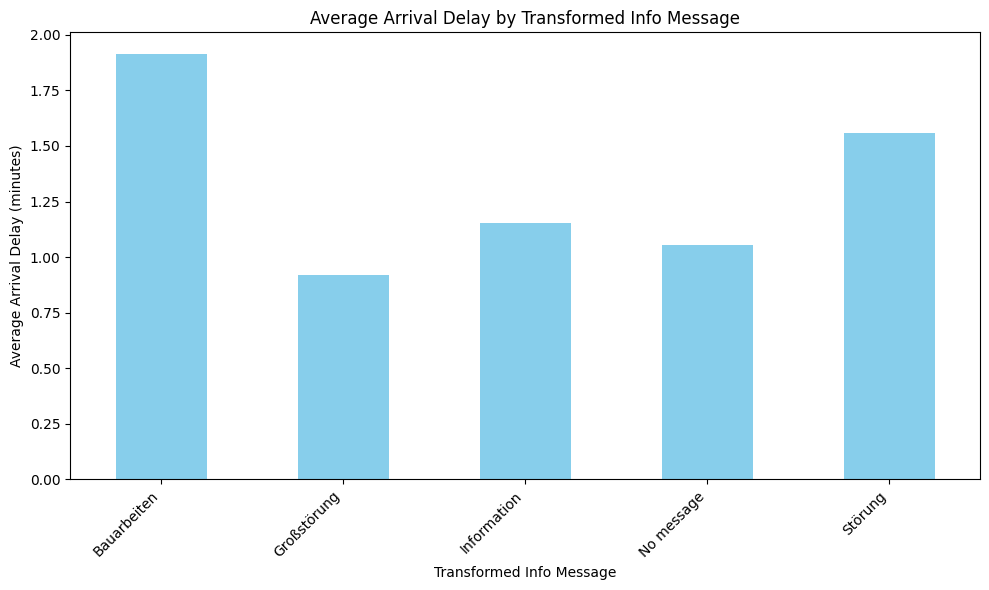

In [21]:
plt.figure(figsize=(10, 6))
mean_delay.plot(kind='bar', color='skyblue')
plt.xlabel("Transformed Info Message")
plt.ylabel("Average Arrival Delay (minutes)")
plt.title("Average Arrival Delay by Transformed Info Message")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()